In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

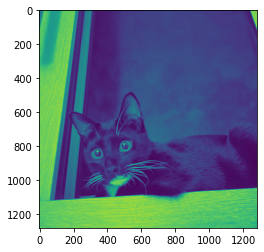

In [ ]:
#image import
for i in [1,2,3,4]: #range(1,5), range(1,101), range(1, 1001)
  globals()['image{}'.format(i)] = cv2.imread("/content/test{}.jpg".format(i),cv2.IMREAD_GRAYSCALE)
plt.imshow(image2)

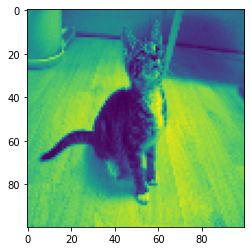

In [ ]:
for i in [1,2,3,4]:
  globals()['image{}_100'.format(i)] = cv2.resize(locals()['image{}'.format(i)],(100,100)).astype(np.int16)
plt.imshow(image3_100)

In [ ]:
for i in [1,2,3,4]:
  globals()['image{}_100'.format(i)] = locals()['image{}_100'.format(i)].reshape(-1,10000)

In [ ]:
target=[1,1,0,0] #data labelling
target=np.array(target)
for i in [1,2,3,4]:
  globals()['image{}_100'.format(i)] = np.append(locals()['image{}_100'.format(i)],target[i-1])

In [ ]:
data=np.ones(10001)
for i in [1,2,3,4]:
  data = np.vstack((data,locals()['image{}_100'.format(i)]))
#data
data=data[1:]
data

array([[146., 151., 154., ..., 157., 163.,   1.],
       [103., 110., 189., ..., 173., 165.,   1.],
       [105., 108.,  98., ..., 148., 145.,   0.],
       [ 77.,  71.,  65., ..., 178., 176.,   0.]])

In [ ]:
data_saved=pd.DataFrame(data, columns=np.arange(0,10001))
data_saved.to_csv("data.csv")

In [ ]:
input=data_saved[np.arange(0,10000)]
input

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,146.0,151.0,154.0,143.0,164.0,145.0,158.0,157.0,173.0,141.0,...,114.0,176.0,186.0,188.0,187.0,156.0,141.0,147.0,157.0,163.0
1,103.0,110.0,189.0,186.0,172.0,149.0,135.0,136.0,140.0,150.0,...,174.0,172.0,171.0,173.0,171.0,175.0,177.0,172.0,173.0,165.0
2,105.0,108.0,98.0,92.0,95.0,96.0,106.0,123.0,133.0,137.0,...,137.0,140.0,160.0,148.0,151.0,149.0,155.0,146.0,148.0,145.0
3,77.0,71.0,65.0,69.0,74.0,59.0,45.0,47.0,50.0,48.0,...,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0,128.0


In [ ]:
target=data_saved[10000]
target

0    1.0
1    1.0
2    0.0
3    0.0
Name: 10000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(input,target)